In [1]:
import sys

# Adicionar path do projeto
sys.path.append('/app')

from app.services.prediction_service import ThermalPredictionService
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualizações
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 1. Inicializar Serviço de Predição

In [2]:
# Criar serviço
prediction_service = ThermalPredictionService()

print(f"MLflow URI: {prediction_service.mlflow_uri}")
print(f"Diretório de modelos: {prediction_service.model_dir}")

MLflow URI: http://mlflow:5000
Diretório de modelos: /app/models


## 2. Carregar e Explorar Dados

In [3]:
# Carregar dados
data_path = "/app/data/sample_thermal_data.csv"
df = pd.read_csv(data_path)

print(f"Total de registros: {len(df):,}")
print(f"\nColunas: {list(df.columns)}")
print(f"\nPeríodo: {df['timestamp'].min()} até {df['timestamp'].max()}")

df.head()

Total de registros: 7,296

Colunas: ['timestamp', 'temperature', 'humidity', 'wind_velocity', 'pressure', 'solar_radiation', 'thermal_sensation', 'comfort_zone']

Período: 2025-01-01 00:00:00 até 2025-10-31 23:00:00


,timestamp,temperature,humidity,wind_velocity,pressure,solar_radiation,thermal_sensation,comfort_zone
0,2025-01-01 00:00:00,20.8,92.0,1.8,886.1,0.472222,21.84,Confortável
1,2025-01-01 01:00:00,20.7,92.0,1.9,886.3,0.472222,21.68,Confortável
2,2025-01-01 02:00:00,20.6,91.0,1.4,886.7,0.472222,20.60,Confortável
3,2025-01-01 03:00:00,20.3,92.0,1.1,886.4,0.472222,20.30,Confortável
4,2025-01-01 04:00:00,19.8,94.0,0.3,885.9,0.472222,19.80,Fresco


In [4]:
# Estatísticas descritivas
df.describe()

,temperature,humidity,wind_velocity,pressure,solar_radiation,thermal_sensation
count,7296.000000,7296.000000,7296.000000,7296.000000,7296.000000,7296.000000
mean,21.718222,63.335047,2.239570,888.339576,241.340013,22.370713
std,4.039723,22.025214,1.023201,2.383793,304.847440,4.711744
min,8.000000,11.000000,0.100000,880.300000,0.000000,8.000000
25%,18.900000,46.000000,1.500000,886.700000,19.400641,19.100000
50%,21.400000,64.000000,2.200000,888.400000,50.237179,21.900000
75%,24.700000,82.000000,3.000000,890.000000,464.805556,25.550000
max,32.900000,99.000000,6.100000,895.300000,1162.611111,39.050000


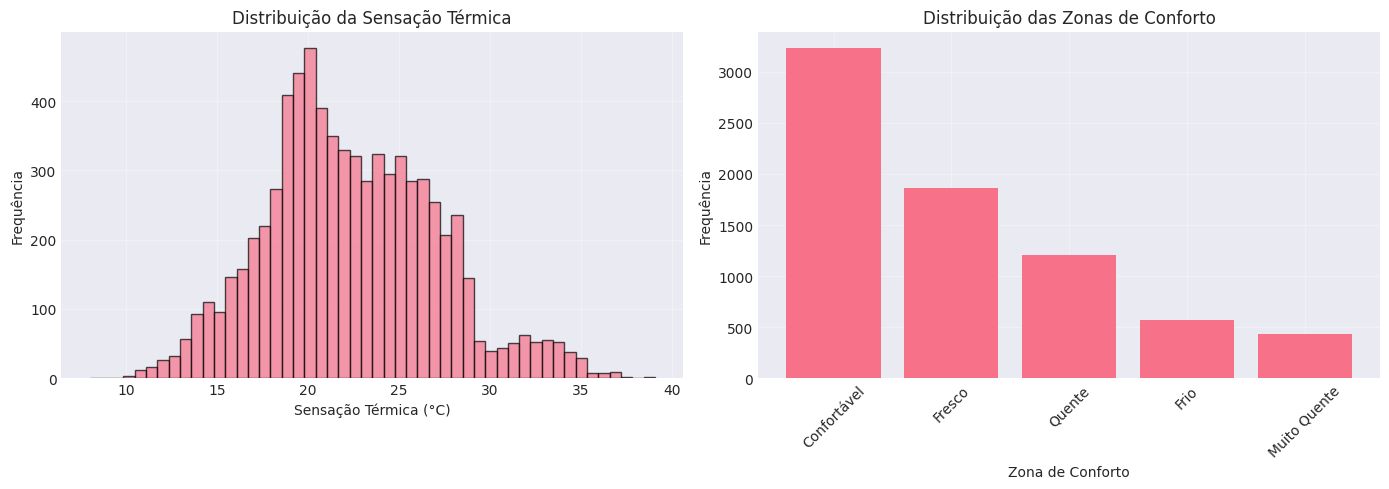

In [5]:
# Distribuição da sensação térmica
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['thermal_sensation'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Sensação Térmica (°C)')
plt.ylabel('Frequência')
plt.title('Distribuição da Sensação Térmica')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
comfort_counts = df['comfort_zone'].value_counts()
plt.bar(comfort_counts.index, comfort_counts.values)
plt.xlabel('Zona de Conforto')
plt.ylabel('Frequência')
plt.title('Distribuição das Zonas de Conforto')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Treinar Modelos

In [6]:
# Treinar todos os modelos
results = prediction_service.train_models(data_path)

print("\n" + "="*60)
print("RESUMO DOS RESULTADOS")
print("="*60)

for model_name, metrics in results.items():
    print(f"\n{model_name.upper()}:")
    print(f"  Test RMSE: {metrics['test_rmse']:.4f}°C")
    print(f"  Test MAE:  {metrics['test_mae']:.4f}°C")
    print(f"  Test R²:   {metrics['test_r2']:.4f}")

2025/12/04 01:30:56 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



📊 Carregando dados de /app/data/sample_thermal_data.csv...
Total de registros: 7296
Treino: (5836, 13), Teste: (1460, 13)
Treinando Random Forest...


2025/12/04 01:30:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


2025/12/04 01:31:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest - Test RMSE: 0.2459, R²: 0.9972
🏃 View run random_forest at: http://mlflow:5000/#/experiments/2/runs/1e434978212c47d4a647e464830deb6e
🧪 View experiment at: http://mlflow:5000/#/experiments/2
Treinando Gradient Boosting...


2025/12/04 01:31:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


2025/12/04 01:31:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Gradient Boosting - Test RMSE: 0.1606, R²: 0.9988
🏃 View run gradient_boosting at: http://mlflow:5000/#/experiments/2/runs/86dc4ab9871a4d40bbf905fd2d6e3a5d
🧪 View experiment at: http://mlflow:5000/#/experiments/2

🎉 Treinamento concluído!

RESUMO DOS RESULTADOS

RANDOM_FOREST:
  Test RMSE: 0.2459°C
  Test MAE:  0.0836°C
  Test R²:   0.9972

GRADIENT_BOOSTING:
  Test RMSE: 0.1606°C
  Test MAE:  0.0547°C
  Test R²:   0.9988


## 4. Comparar Modelos

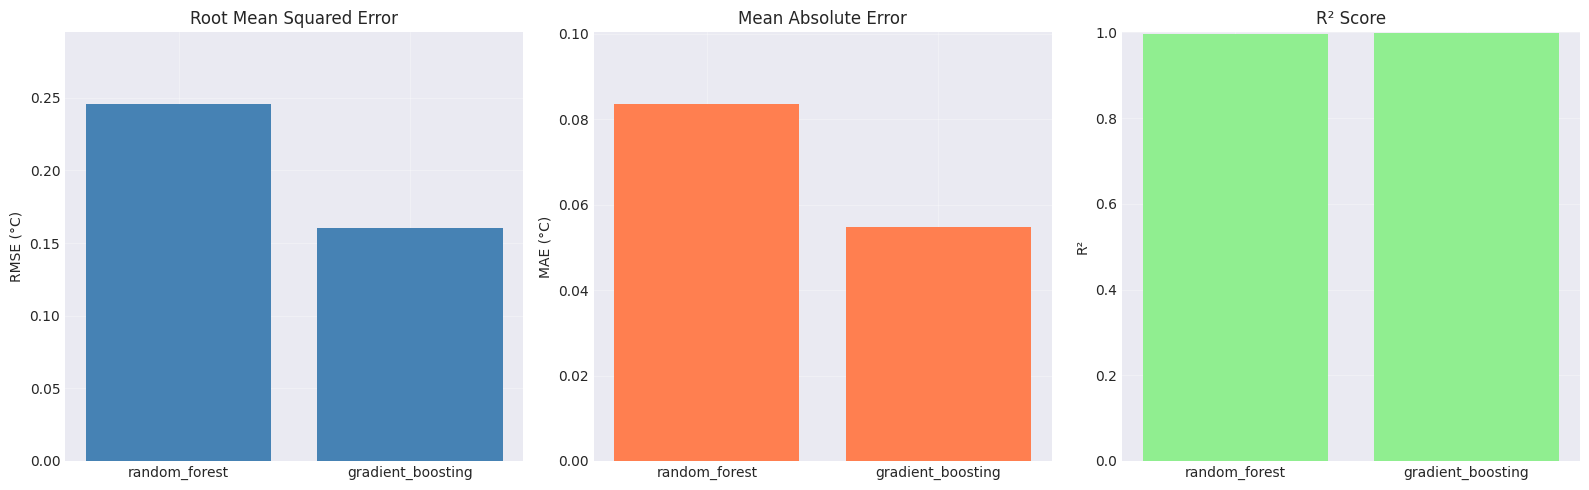

In [7]:
# Comparação visual
model_names = list(results.keys())
test_rmse = [results[m]['test_rmse'] for m in model_names]
test_mae = [results[m]['test_mae'] for m in model_names]
test_r2 = [results[m]['test_r2'] for m in model_names]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# RMSE
axes[0].bar(model_names, test_rmse, color='steelblue')
axes[0].set_ylabel('RMSE (°C)')
axes[0].set_title('Root Mean Squared Error')
axes[0].set_ylim([0, max(test_rmse) * 1.2])
axes[0].grid(alpha=0.3)

# MAE
axes[1].bar(model_names, test_mae, color='coral')
axes[1].set_ylabel('MAE (°C)')
axes[1].set_title('Mean Absolute Error')
axes[1].set_ylim([0, max(test_mae) * 1.2])
axes[1].grid(alpha=0.3)

# R²
axes[2].bar(model_names, test_r2, color='lightgreen')
axes[2].set_ylabel('R²')
axes[2].set_title('R² Score')
axes[2].set_ylim([0, 1])
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Testar Predições

In [8]:
# Teste com dados de exemplo
test_cases = [
    {
        'name': 'Dia Quente de Verão',
        'temperature': 32.0,
        'humidity': 70.0,
        'wind_velocity': 3.5,
        'pressure': 1013.0,
        'solar_radiation': 850.0
    },
    {
        'name': 'Noite Fria de Inverno',
        'temperature': 12.0,
        'humidity': 80.0,
        'wind_velocity': 15.0,
        'pressure': 1020.0,
        'solar_radiation': 0.0
    },
    {
        'name': 'Tarde Confortável',
        'temperature': 24.0,
        'humidity': 60.0,
        'wind_velocity': 5.0,
        'pressure': 1015.0,
        'solar_radiation': 400.0
    }
]

for case in test_cases:
    print(f"\n{'='*60}")
    print(f"CASO: {case['name']}")
    print(f"{'='*60}")
    
    # Predição com Random Forest
    pred_rf = prediction_service.predict(
        temperature=case['temperature'],
        humidity=case['humidity'],
        wind_velocity=case['wind_velocity'],
        pressure=case['pressure'],
        solar_radiation=case['solar_radiation'],
        model_name='random_forest'
    )
    
    print("\nEntradas:")
    print(f"  Temperatura: {case['temperature']}°C")
    print(f"  Umidade: {case['humidity']}%")
    print(f"  Vento: {case['wind_velocity']} km/h")
    print(f"  Pressão: {case['pressure']} hPa")
    print(f"  Radiação Solar: {case['solar_radiation']} W/m²")
    
    print("\nResultados:")
    print(f"  Sensação Física: {pred_rf['physical_sensation']}°C ({pred_rf['physical_comfort_zone']})")
    if 'ml_prediction' in pred_rf:
        print(f"  Predição ML: {pred_rf['ml_prediction']}°C ({pred_rf['ml_comfort_zone']})")
        print(f"  Diferença: {pred_rf['prediction_difference']}°C")


CASO: Dia Quente de Verão



Entradas:
  Temperatura: 32.0°C
  Umidade: 70.0%
  Vento: 3.5 km/h
  Pressão: 1013.0 hPa
  Radiação Solar: 850.0 W/m²

Resultados:
  Sensação Física: 31.74°C (Muito Quente)
  Predição ML: 30.26°C (Muito Quente)
  Diferença: -1.48°C

CASO: Noite Fria de Inverno

Entradas:
  Temperatura: 12.0°C
  Umidade: 80.0%
  Vento: 15.0 km/h
  Pressão: 1020.0 hPa
  Radiação Solar: 0.0 W/m²

Resultados:
  Sensação Física: 10.45°C (Muito Frio)
  Predição ML: 11.99°C (Muito Frio)
  Diferença: 1.54°C

CASO: Tarde Confortável

Entradas:
  Temperatura: 24.0°C
  Umidade: 60.0%
  Vento: 5.0 km/h
  Pressão: 1015.0 hPa
  Radiação Solar: 400.0 W/m²

Resultados:
  Sensação Física: 25.27°C (Confortável)
  Predição ML: 24.64°C (Confortável)
  Diferença: -0.63°C


## 6. Análise de Feature Importance

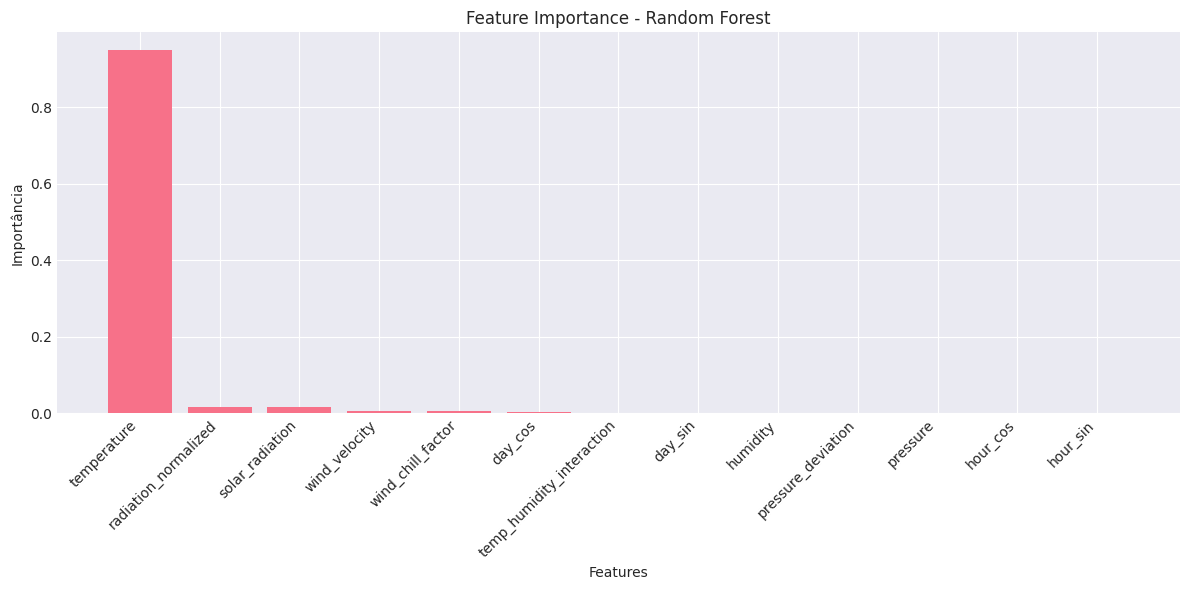


Top 5 Features mais importantes:
1. temperature: 0.9483
2. radiation_normalized: 0.0176
3. solar_radiation: 0.0154
4. wind_velocity: 0.0073
5. wind_chill_factor: 0.0068


In [9]:
# Feature importance do Random Forest
if 'random_forest' in prediction_service.models:
    model = prediction_service.models['random_forest']
    
    # Nomes das features
    feature_names = [
        'temperature', 'humidity', 'wind_velocity', 'pressure', 'solar_radiation',
        'hour_sin', 'hour_cos', 'day_sin', 'day_cos',
        'temp_humidity_interaction', 'wind_chill_factor', 'radiation_normalized', 'pressure_deviation'
    ]
    
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importância')
    plt.title('Feature Importance - Random Forest')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 Features mais importantes:")
    for i in range(min(5, len(indices))):
        print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

## 7. Conclusões

**Modelos treinados com sucesso!**

Os modelos estão salvos em `/app/models` e registrados no MLflow.

**Para usar os modelos via API:**
```bash
# Predição única
curl -X POST "http://localhost:8060/prediction/predict" \
  -H "Content-Type: application/json" \
  -d '{
    "temperature": 28.0,
    "humidity": 65.0,
    "wind_velocity": 5.0,
    "pressure": 1013.0,
    "solar_radiation": 600.0
  }'
```

**Acessar MLflow:**
- URL: http://localhost:5000
- Visualizar experimentos, métricas e artefatos